# Disorders in All Countries 

### Questions:
- What are the types of mental health disorder that people around the world suffer?
- more questions to come ... 

<hr>

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
# read CSV files with low_memory=False
df1 = pd.read_csv('csvfiles/drinking/1- mental-illnesses-prevalence.csv', low_memory=False)
df2 = pd.read_csv('csvfiles/drinking/drinks.csv', low_memory=False)
df3 = pd.read_csv('csvfiles/happiness/2015.csv', low_memory=False)

In [194]:
df1

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


### Preprocessing

In [195]:
def correlationFunc(expl,data):
    correlations = data.corr()
    correlation_with_expl = correlations[expl].abs()

    # exclude 'expl'
    correlation_with_expl = correlation_with_expl.drop(expl)

    # find the variable most related
    most_related_variable = correlation_with_expl.idxmax()
    correlation_value = correlation_with_expl.max()
    
    print(f"The variable most related to '{expl}' is '{most_related_variable}' with a correlation of {correlation_value:.2f}.")

In [196]:
df1 = df1[df1['Year'] == 2015]
df1 = df1.dropna(subset=['Code']) 
df1 = df1.rename(columns={df1.columns[3]: 'Schizophrenia'})
df1 = df1.rename(columns={df1.columns[4]: 'Depression'})
df1 = df1.rename(columns={df1.columns[5]: 'Anxiety'})
df1 = df1.rename(columns={df1.columns[6]: 'Bipolar'})
df1 = df1.rename(columns={df1.columns[7]: 'EatingDisorder'})

# renaming columns
# Sex: Both 
# Age: Age-standardized

merged_df = df1.merge(df3, left_on='Entity', right_on='Country', how='inner')
merged_df = merged_df.sort_values(by='Depression')
# merged_df

print(merged_df.columns)
unique_regions = merged_df['Region'].unique()
print(unique_regions)


# explanatories = ['EatingDisorder','Anxiety','Bipolar','Schizophrenia']
# for var in explanatories: 
#     correlationFunc(var,merged_df)

Index(['Entity', 'Code', 'Year', 'Schizophrenia', 'Depression', 'Anxiety',
       'Bipolar', 'EatingDisorder', 'Country', 'Region', 'Happiness Rank',
       'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')
['Southeastern Asia' 'Eastern Asia' 'Central and Eastern Europe'
 'Latin America and Caribbean' 'Southern Asia' 'Western Europe'
 'North America' 'Sub-Saharan Africa' 'Middle East and Northern Africa'
 'Australia and New Zealand']
The variable most related to 'EatingDisorder' is 'Economy (GDP per Capita)' with a correlation of 0.73.
The variable most related to 'Anxiety' is 'Bipolar' with a correlation of 0.66.
The variable most related to 'Bipolar' is 'EatingDisorder' with a correlation of 0.71.
The variable most related to 'Schizophrenia' is 'Health (Life Expectancy)' with a correlation of 0.77.


In [197]:
merged_df

,Entity,Code,Year,Schizophrenia,Depression,Anxiety,Bipolar,EatingDisorder,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
114,Singapore,SGP,2015,0.317429,1.943582,2.701048,0.718114,0.430496,Singapore,Southeastern Asia,24,6.798,0.03780,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501
63,Japan,JPN,2015,0.306777,2.101324,2.336259,0.644289,0.387185,Japan,Eastern Asia,46,5.987,0.03581,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,1.68435
104,Poland,POL,2015,0.294183,2.111806,3.097520,0.550813,0.177764,Poland,Central and Eastern Europe,60,5.791,0.04263,1.12555,1.27948,0.77903,0.53122,0.04212,0.16759,1.86565
118,South Korea,KOR,2015,0.299480,2.136813,3.496866,0.500660,0.336533,South Korea,Eastern Asia,47,5.984,0.04098,1.24461,0.95774,0.96538,0.33208,0.07857,0.18557,2.21978
90,Myanmar,MMR,2015,0.275034,2.168315,3.924699,0.316718,0.087878,Myanmar,Southeastern Asia,129,4.307,0.04351,0.27108,0.70905,0.48246,0.44017,0.19034,0.79588,1.41805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Lesotho,LSO,2015,0.202791,5.471948,3.578326,0.532171,0.104392,Lesotho,Sub-Saharan Africa,97,4.898,0.09438,0.37545,1.04103,0.07612,0.31767,0.12504,0.16388,2.79832
44,Gabon,GAB,2015,0.228589,5.550644,3.967308,0.562197,0.179994,Gabon,Sub-Saharan Africa,143,3.896,0.04547,1.06024,0.90528,0.43372,0.31914,0.11091,0.06822,0.99895
3,Angola,AGO,2015,0.219012,5.747701,3.968621,0.553900,0.134965,Angola,Sub-Saharan Africa,137,4.033,0.04758,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
25,Central African Republic,CAF,2015,0.192797,5.933393,4.372940,0.529950,0.073761,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230


In [210]:
print(merged_df.columns)

Index(['Entity', 'Code', 'Year', 'Schizophrenia', 'Depression', 'Anxiety',
       'Bipolar', 'EatingDisorder', 'Country', 'Region', 'Happiness Rank',
       'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')


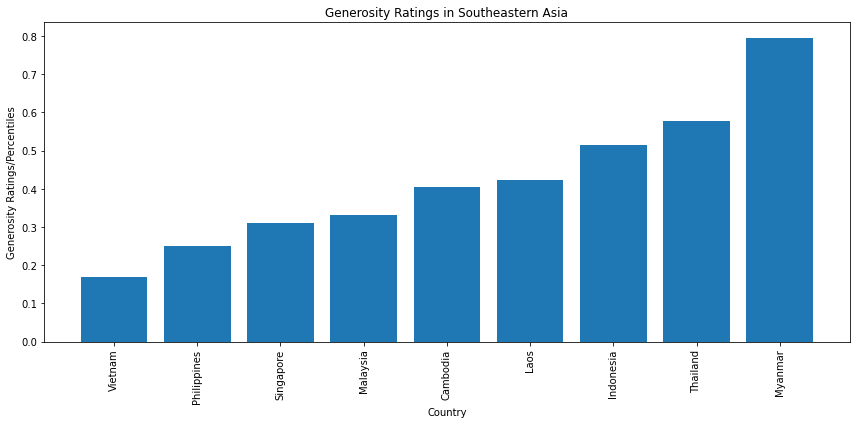

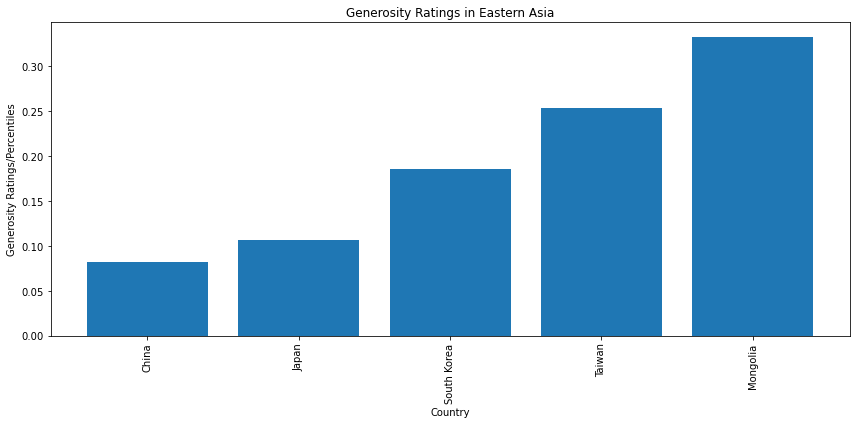

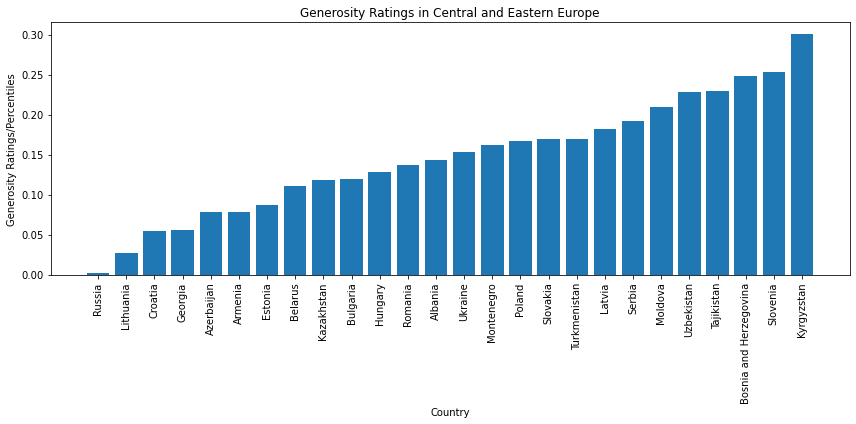

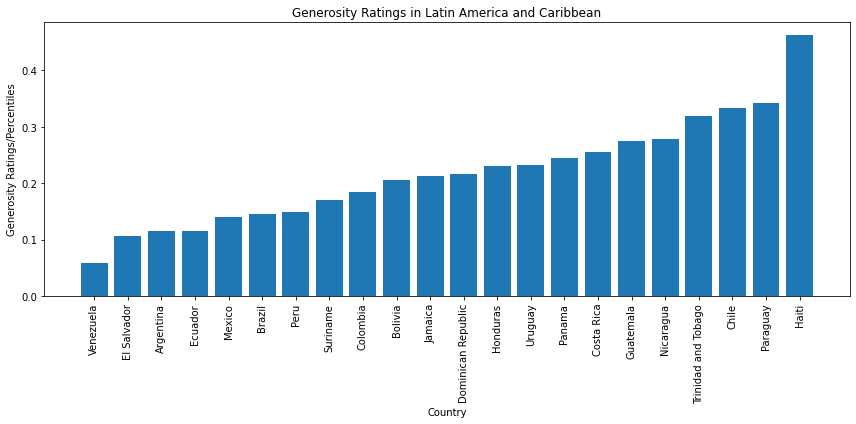

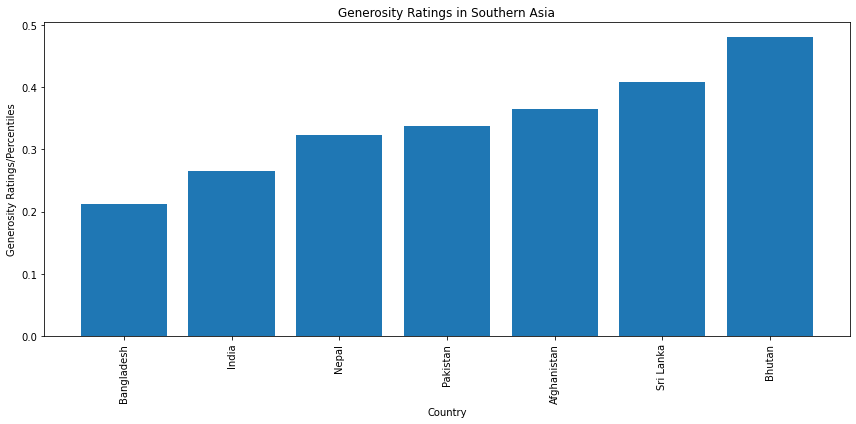

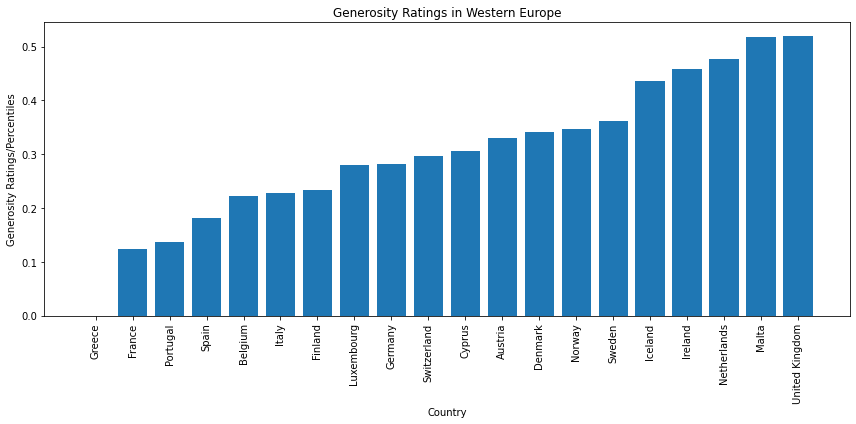

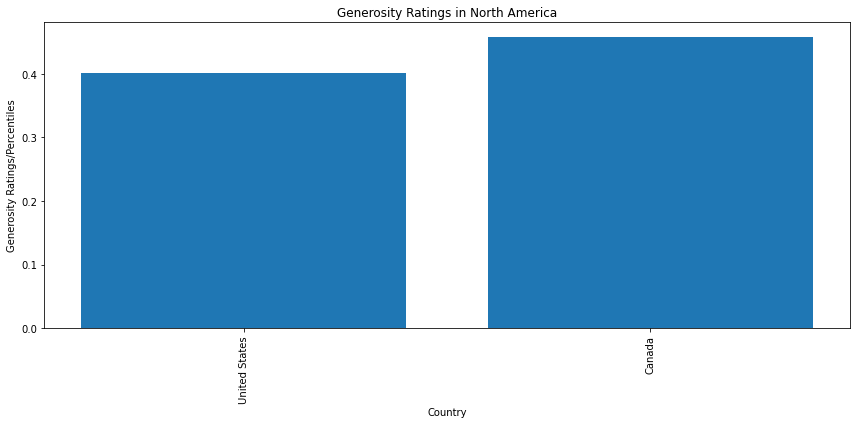

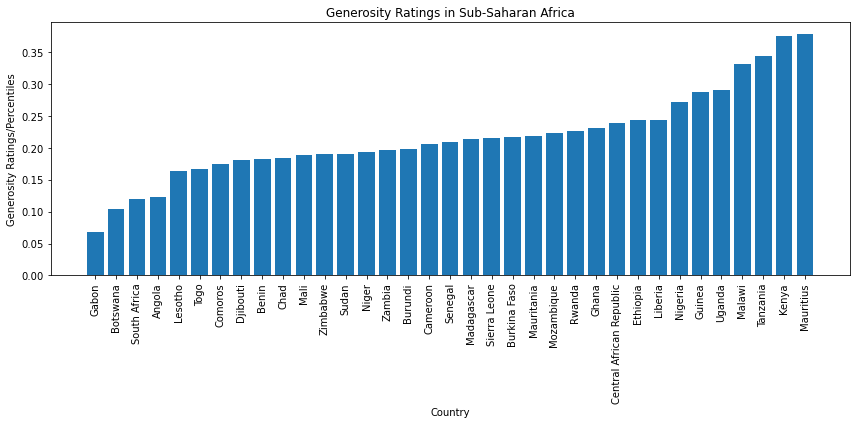

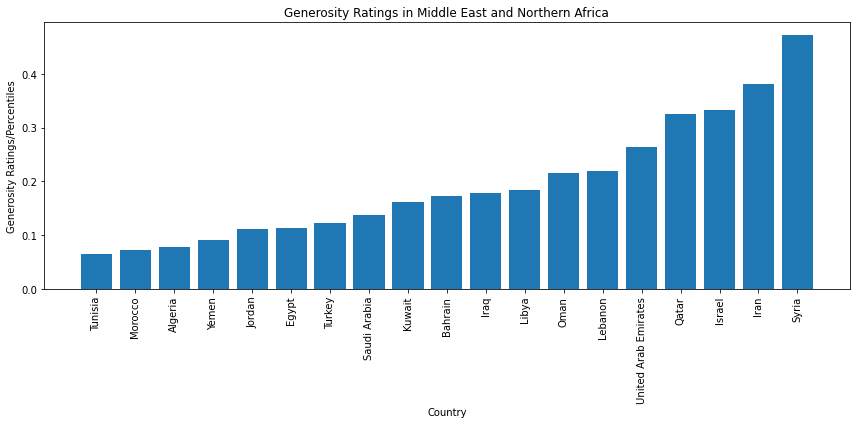

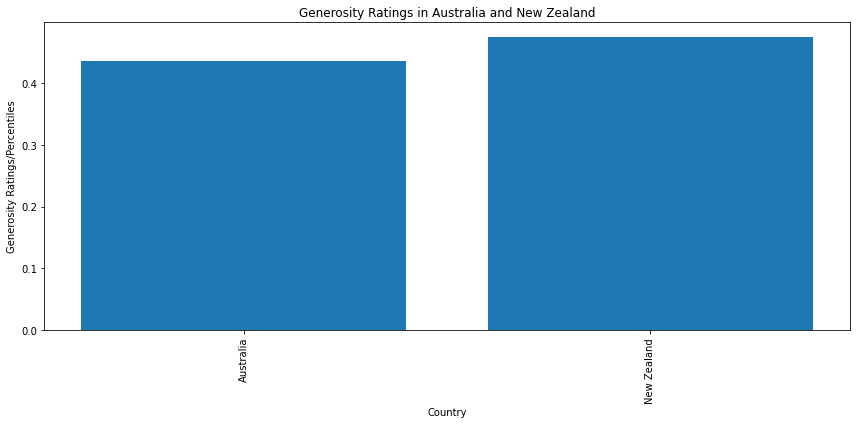

In [215]:
# enter the disorder or any of the column names you're curious about here
var = 'Generosity'

for region in unique_regions:
    region_df = merged_df[merged_df['Region'] == region]
    region_df = region_df.sort_values(by=var)  # Sort by the disorder ratings
    plt.figure(figsize=(12, 6))  # adjust the figure size as needed
    plt.bar(region_df['Entity'], region_df[var])
    plt.xlabel('Country')
    plt.ylabel(f'{var} Ratings/Percentiles')
    plt.title(f'{var} Ratings in {region}')
    plt.xticks(rotation=90)  
    plt.tight_layout()  
    plt.show()

# plt.figure(figsize=(20,6))
# plt.bar(merged_df['Entity'], merged_df['Depression'])
# plt.xlabel('Country')
# plt.ylabel('Depression Ratings')
# plt.xticks(rotation=90)  
# plt.tight_layout()  
# plt.show()

Note: There are obviously some outliers and some of the data may be misleading so I will probably implement something to fact check or get the accuracy of these rates. 